<h1 align="center">Introduction to Machine Learning - Course Code: 25737</h1>
<h4 align="center">Instructor: Dr. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>
<h4 align="center">Computer Assignment 3</h4>
<h4 align="center">

Question 1

</h4>

# Personal Data

In [1]:
# Set your student number
student_number = 400101283
Name = 'Kimia'
Last_Name = 'Ramezan'

# Rules
- You are not allowed to add or remove cells. You **must use the provided space to write your code**. If you don't follow this rule, **your Practical Assignment won't be graded**.  

- Collaboration and using the internet is allowed, but your code **must be written by yourself**. **Copying code** from each other or from available resources will result in a **zero score for the assignment**.

- You are not allowed to use `torch.nn`, `torch.optim` and any activation function and loss function implemented in torch.

In [3]:
!pip install numpy
!pip install matplotlib
!pip install torchvision
!pip install torch

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

## Importing Libraries

In [4]:
import torch
from torchvision.datasets import FashionMNIST
from torchvision import transforms
from torch.utils.data import DataLoader

import numpy as np
from matplotlib import pyplot as plt
from typing import Dict

## Datasets and Dataloaders

Here, we download and load the train and test `FashionMNIST` dataset with the desired transforms. Then, we define the dataloaders for `train` and `test`.

In [5]:
train_set = FashionMNIST(root='.', train=True, download=True, transform=transforms.ToTensor())
test_set = FashionMNIST(root='.', train=False, download=True, transform=transforms.ToTensor())

100%|██████████| 26421880/26421880 [00:01<00:00, 16572900.85it/s]


Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 298947.80it/s]


Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5468192.92it/s]


Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 12226657.41it/s]

Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw




Here you have to calculate the number of classes amd input dimention of the first layer (how many pixels does each image have?).

Each image in the dataset is 28 pixels wide and 28 pixels high, and since they are grayscale, each pixel is represented by a single value (not RGB). Thus, the input dimension for each image, when considering it as an input to a neural network layer, is typically the total number of pixels in the image. Therefore, the input dimension is 28 x 28 = 784 pixels.

In [6]:
## FILL HERE
# input_dim = .....
num_classes = 10
input_dim = 784  # 28 x 28 pixels

In [9]:
train_loader = DataLoader(train_set, 64, shuffle=True)
test_loader = DataLoader(test_set, 64, shuffle=True)

## Visualization

Visualize 1 random image from each class by using `plt.subplots`

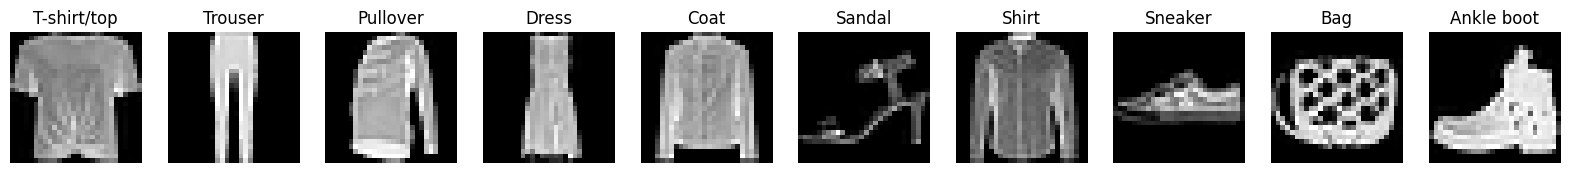

In [12]:
class_names = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}
class_images = [None] * 10

# check if all classes have images
def all_classes_filled(images_list):
    return all(image is not None for image in images_list)

# find one image for each class
for images, labels in train_loader:
    for image, label in zip(images, labels):
        label = label.item()
        if class_images[label] is None:
            class_images[label] = image
        if all_classes_filled(class_images):
            break
    if all_classes_filled(class_images):
        break

fig, axes = plt.subplots(1, 10, figsize=(20, 4))
for idx, image in enumerate(class_images):
    ax = axes[idx]
    ax.imshow(image.squeeze(), cmap='gray')
    ax.set_title(class_names[idx])
    ax.axis('off')

plt.show()

## Initializing model's parameters

In this part, we create the model and initialize its parameters and store the values of these parameters in the variable `parameters` which is a dictionary including the weigths and biases of each layer.

In [13]:
def add_linear_layer(parameters: dict, shape, device, i=None):
    """
    This function adds parameters of a linear unit of shape `shape` to the `parameters` dictionary.
    """
    n_in, n_out = shape
    with torch.no_grad():
        w = torch.zeros(*shape, device=device)
        # kaiming initialization for ReLU activations:
        bound = 1 / np.sqrt(n_in).item()
        w.uniform_(-bound, bound)
        b = torch.zeros(n_out, device=device)  # no need to (1, n_out). it will broadcast itself.
    w.requires_grad = True
    b.requires_grad = True
    # `i` is used to give numbers to parameter names
    parameters.update({f'w{i}': w, f'b{i}': b})

Now we define our neural network with the given layers and add the weights and biases to the dictionary `parameters`. **You are allowed to modify the values of the layers**.

In [14]:
# input_dim : input dimention of the first layer, which you have calculated before.
layers = [
    (input_dim, 512),
    (512, 256),
    (256, 128),
    (128, 64),
    (64, num_classes)
]
num_layers = len(layers)
parameters = {}

# setting the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# adding the parameters to the dictionary
for i, shape in enumerate(layers):
    add_linear_layer(parameters, shape, device, i)

parameters.keys()

dict_keys(['w0', 'b0', 'w1', 'b1', 'w2', 'b2', 'w3', 'b3', 'w4', 'b4'])

## Defining the required functions

In this section, we should define the required functions. For each of these functions, the inputs and the desired outputs are given and you should write all or part of the function. **You are not allowed to use the activation functions and the loss functions implemented in torch**.

Computing affine and relu outputs:

In [15]:
def affine_forward(x, w, b):
    ## FILL HERE
  y = x @ w + b
  return y


def relu(x):
    ## FILL HERE
    return torch.maximum(x, torch.tensor(0.0, device=x.device))

Function `model` returns output of the whole model for the input `x` using the parameters:

In [16]:
def model(x: torch.Tensor, parameters, num_layers=num_layers):
    # number of batches
    B = x.shape[0]
    x = x.view(B, -1)

    ## FILL HERE
    for i in range(num_layers):
        w = parameters[f'w{i}']
        b = parameters[f'b{i}']
        x = affine_forward(x, w, b)
        if i < num_layers - 1:
            x = relu(x)
    output = x
    return output

Implementing cross entropy loss:

In [17]:
def cross_entropy_loss(scores, y):
    n = len(y)
    ## FILL HERE
    exp_scores = torch.exp(scores)
    probabilities = exp_scores / torch.sum(exp_scores, axis=1, keepdim=True)
    correct_log_probs = -torch.log(probabilities[range(n), y])
    loss = torch.sum(correct_log_probs) / n

    return loss

Implementing a function for optimizing paramters and a function to zeroing out their gradients:

In [18]:
def sgd_optimizer(parameters: Dict[str, torch.Tensor], learning_rate=0.001):
    '''This function gets the parameters and a learning rate. Then updates the parameters using their
    gradient. Finally, you should zero the gradients of the parameters after updating
    the parameter value.'''
    ## FILL HERE
    for param in parameters.values():
        if param.grad is not None:
            param.data -= learning_rate * param.grad.data
            param.grad.zero_()

Training functions:

In [19]:
def accuracy(y_pred: np.ndarray, y_true: np.ndarray):
    ## FILL HERE
    correct_predictions = np.sum(y_pred == y_true)
    total_predictions = len(y_true)
    acc = correct_predictions / total_predictions
    return acc

def train(train_loader, learning_rate=0.001, epoch=None):
    '''This function implements the training loop for a single epoch. For each batch you should do the following:
        1- Calculate the output of the model to the given input batch
        2- Calculate the loss based on the model output
        3- Update the gradients using backward method
        4- Optimize the model parameters using the sgd_optimizer function defined previously
        5- Print the train loss (Show the epoch and batch as well)
        '''
    train_loss = 0
    N_train = len(train_loader.dataset)

    # Creating empty lists Y and Y_pred to store the labels and predictions of each batch
    # for calculateing the accuracy later
    Y = []
    Y_pred = []


    for i, (x, y) in enumerate(train_loader):
        x = x.to(device)
        y = y.to(device)
        p = model(x, parameters)

        ## FILL HERE
        loss = cross_entropy_loss(p, y)
        train_loss += loss.item()
        loss.backward()
        sgd_optimizer(parameters, learning_rate)

        y_pred = p.argmax(dim=-1)
        Y.append(y.cpu().numpy())
        Y_pred.append(y_pred.cpu().numpy())

    Y = np.concatenate(Y)
    Y_pred = np.concatenate(Y_pred)
    acc = accuracy(Y_pred, Y)
    print(f'Accuracy of train set: {acc}')
    return train_loss / N_train, acc


def validate(loader, epoch=None, set_name=None):
    '''This function validates the model on the test dataloader. The function goes through each batch and does
    the following on each batch:
        1- Calculate the model output
        2- Calculate the loss using the model output
        3- Print the loss for each batch and epoch

    Finally the function calculates the model accuracy.'''
    total_loss = 0
    N = len(loader.dataset)

    Y = []
    Y_pred = []
    for i, (x, y) in enumerate(loader):
        x = x.to(device)
        y = y.to(device)
        p = model(x, parameters)

        loss = cross_entropy_loss(p, y)
        total_loss += loss.item()
        y_pred = p.argmax(dim=-1)

        Y.append(y.cpu().numpy())
        Y_pred.append(y_pred.cpu().numpy())
        print(f'Epoch {epoch}, Batch {i}, {set_name} Loss: {loss.item()}')

    Y = np.concatenate(Y)
    Y_pred = np.concatenate(Y_pred)
    acc = accuracy(Y_pred, Y)
    print(f'Epoch {epoch}, Accuracy of {set_name} set: {acc}')

    return total_loss / N, acc

In [20]:
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

In [21]:
def train_model(dataloaders, num_epochs, learning_rate=0.001, model_name='pytorch_model'):
    '''This function trains the model for the number of epochs given and stores, calculates and prints the train
    and test losses and accuracies. Finally, it plots the accuracy and loss history for training and test sets'''
    train_loader, test_loader = dataloaders

    for epoch in range(num_epochs):
        ## FILL HERE
        ## You should calculate the train and test loss and accuracies for each epoch and add them to
        ## the lists `train_losses`, `test_losses`, `train_accuracies` and `test_accuracies`
        train_loss, train_acc = train(train_loader, learning_rate, epoch)
        test_loss, test_acc = validate(test_loader, epoch, set_name='test')

        train_losses.append(train_loss)
        test_losses.append(test_loss)
        train_accuracies.append(train_acc)
        test_accuracies.append(test_acc)

        print(f'Epoch {epoch+1}/{num_epochs}:')
        print(f'Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.2f}')
        print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}')

    ## plot the loss history of training and test sets
    ## FILL HERE
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Train Loss')
    plt.plot(test_losses, label='Test Loss')
    plt.title('Loss History')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

    ## plot the accuracy history of training and test sets
    ## FILL HERE
    plt.figure(figsize=(10, 5))
    plt.plot(train_accuracies, label='Train Accuracy')
    plt.plot(test_accuracies, label='Test Accuracy')
    plt.title('Accuracy History')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

Accuracy of train set: 0.3377833333333333
Epoch 0, Batch 0, test Loss: 2.2748303413391113
Epoch 0, Batch 1, test Loss: 2.272495746612549
Epoch 0, Batch 2, test Loss: 2.266124725341797
Epoch 0, Batch 3, test Loss: 2.267388105392456
Epoch 0, Batch 4, test Loss: 2.26432204246521
Epoch 0, Batch 5, test Loss: 2.2687063217163086
Epoch 0, Batch 6, test Loss: 2.273946762084961
Epoch 0, Batch 7, test Loss: 2.2724456787109375
Epoch 0, Batch 8, test Loss: 2.2716903686523438
Epoch 0, Batch 9, test Loss: 2.270747423171997
Epoch 0, Batch 10, test Loss: 2.271632671356201
Epoch 0, Batch 11, test Loss: 2.2751870155334473
Epoch 0, Batch 12, test Loss: 2.2650716304779053
Epoch 0, Batch 13, test Loss: 2.2639825344085693
Epoch 0, Batch 14, test Loss: 2.264436960220337
Epoch 0, Batch 15, test Loss: 2.27082896232605
Epoch 0, Batch 16, test Loss: 2.2724509239196777
Epoch 0, Batch 17, test Loss: 2.2710254192352295
Epoch 0, Batch 18, test Loss: 2.2694268226623535
Epoch 0, Batch 19, test Loss: 2.271134614944458


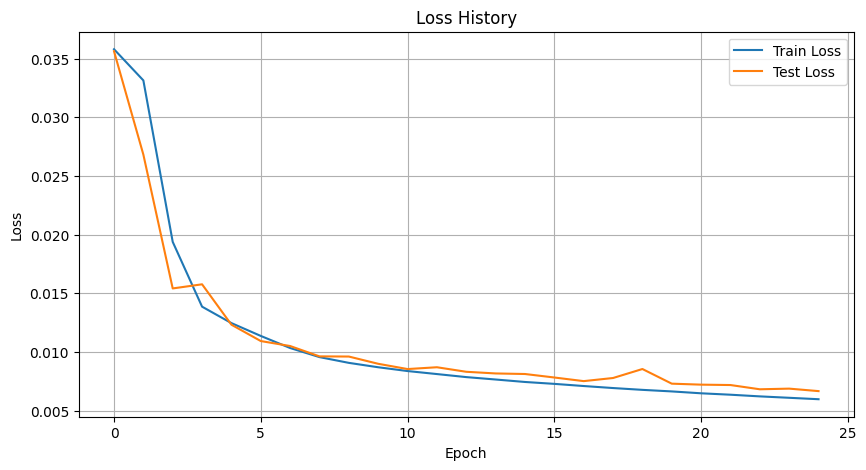

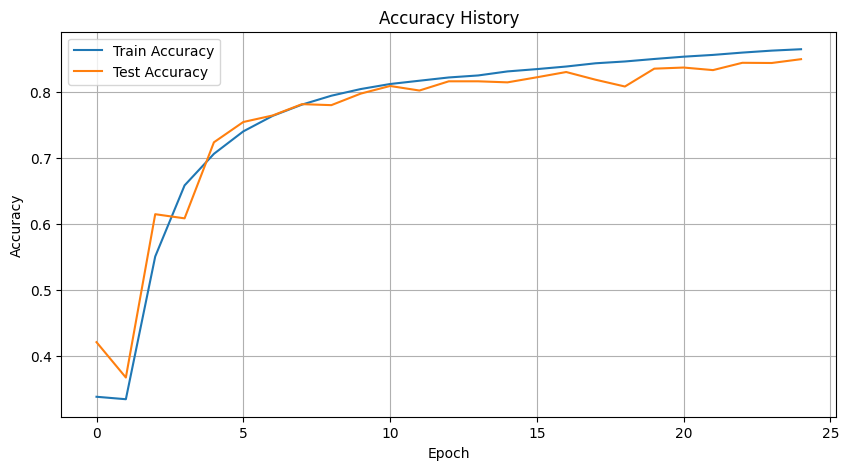

In [22]:
train_model([train_loader, test_loader], num_epochs=25, learning_rate=0.005)

In [23]:
print(f'Final test accuracy: {test_accuracies[-1]}')

Final test accuracy: 0.8504


## Visualization of the labels and predictions

In this section, you should visual one image from each class and show both the actual label and the predicted label for that image.

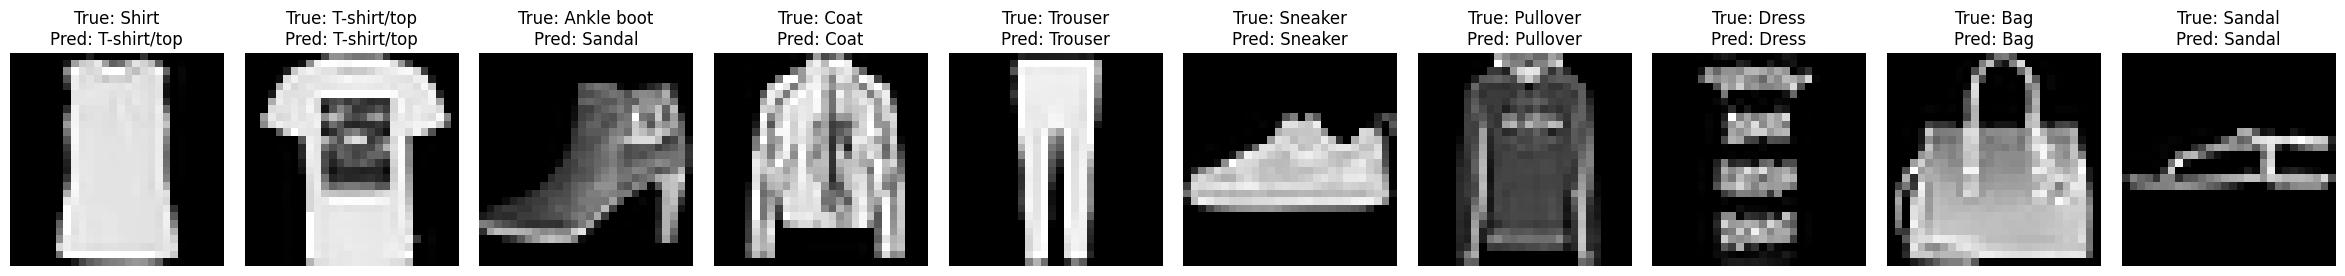

In [30]:
## FILL HERE
def visualize_labels_and_predictions(loader, parameters, class_names):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    images = []
    true_labels = []
    pred_labels = []
    found_labels = set()

    for x, y in loader:
        x = x.to(device)
        y = y.to(device)
        output = model(x, parameters)
        predicted = output.argmax(dim=1)

        for img, true, pred in zip(x, y, predicted):
            if true.item() not in found_labels:
                images.append(img.cpu())
                true_labels.append(true.item())
                pred_labels.append(pred.item())
                found_labels.add(true.item())
            if len(found_labels) == len(class_names):  # Stop once we have all classes
                break
        if len(found_labels) == len(class_names):
            break

    fig, axes = plt.subplots(1, len(class_names), figsize=(30, 10))
    for i, (img, true, pred) in enumerate(zip(images, true_labels, pred_labels)):
        ax = axes[i]
        img = img.squeeze()
        ax.imshow(img, cmap='gray')
        ax.set_title(f"True: {class_names[true]}\nPred: {class_names[pred]}")
        ax.axis('off')

    # Adjust the spacing
    plt.subplots_adjust(wspace=0.1, hspace=0.1)  # Adjust the width and height spaces
    plt.show()

# Usage:
visualize_labels_and_predictions(test_loader, parameters, class_names)
